In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2 
import tensorflow as tf
from tensorflow.keras.models import load_model

In [5]:
model_resnet = load_model(r'modelResnet50.h5', compile=False)

In [6]:
model_unet = load_model(r'Unet_tumor.h5', compile=False)

In [7]:
image = []

image_size = 256
labels = ['0', '1', '2', '3']

for i in labels:
    folder_path = os.path.join('./datasets/image', i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        image.append(img/255.)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted label: no_tumor 
Confidence: 100.00%



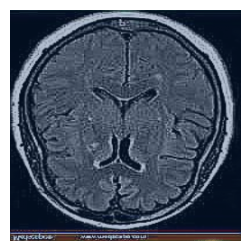

In [25]:
labels_new = ['no_tumor', 'giloma_tumor', 'meningioma_tumor', 'pituitary_tumor']
index = np.random.randint(0, len(image))

y_pred_resnet = model_resnet.predict(image[index].reshape(1, 256, 256, 3))
y_pred_unet = model_unet.predict(image[index].reshape(1, 256, 256, 3))[0]
pred_class = np.argmax(y_pred_resnet)
pred_label = labels_new[pred_class]
confidence = y_pred_resnet[0][pred_class]


print(f"\033[94mPredicted label: {pred_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(np.squeeze(image[index]),cmap='gray')
plt.imshow(np.squeeze(y_pred_unet),alpha=0.3,cmap='Blues')
plt.axis('off')  
plt.show()